<a href="https://colab.research.google.com/github/Danddt/Russian_Opinion_Polls/blob/main/GIT_of_normal_distr_op_polls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/2023-05-08/Levada_Putin’s approval rating.csv',  ) #usecols=['date', 'Approve']
data_gov =pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/2023-05-08/Levada_Approval of the government.csv')

In [ ]:
data

,date,Approve,Disapprove,No answer
0,1999-8,31.0,33.0,37.0
1,1999-9,53.0,27.0,20.0
2,1999-10,65.0,20.0,15.0
3,1999-11,80.0,12.0,8.0
4,1999-12,79.0,13.0,8.0
...,...,...,...,...
278,2022-12,81.0,17.0,2.0
279,2023-1,82.0,16.0,2.0
280,2023-2,83.0,14.0,2.0
281,2023-3,82.0,15.0,3.0


In [ ]:
data['date'] = pd.to_datetime(data['date'].str.strip(), format='%Y-%m')
data_gov['date'] = pd.to_datetime(data_gov['date'].str.strip(), format='%Y-%m')

In [ ]:
years= data.groupby(data.date.dt.year)['Approve'].count().reset_index()
years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   date     25 non-null     int64
 1   Approve  25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [ ]:
years_cons = years['date'][1:-1]

In [ ]:
yr_list = years_cons.to_list()

In [ ]:
import math
import numpy as np
from scipy.stats import shapiro 

In [ ]:
years_normal = []
years_not_norm=[]
df_list=[]
years_nr=[]
years_not_nr = []
dicto = {}

for year in yr_list:
  yr_temp=data[data['date'].dt.year==int(year)]
  mu_loc = yr_temp['Approve'].mean()
  std_scale = yr_temp['Approve'].mean()
  sz_size = 12
  year_shap= yr_temp['Approve'].to_numpy()
  dicto[year] = year_shap
  df_list.append(yr_temp)

  shapo = shapiro(year_shap)
  if shapo[1]>0.05:
    print(year, ':', shapo)
    temp_yes = data[data['date'].dt.year==int(year)]
    years_normal.append(temp_yes)
    years_nr.append(year)


  if shapo[1]<=0.05:
    print('Not normal distribution: ', year, shapo)
    temp_not = data[data['date'].dt.year==int(year)]
    years_not_norm.append(temp_not)
    years_not_nr.append(year)


2000 : ShapiroResult(statistic=0.9597605466842651, pvalue=0.7804057598114014)
2001 : ShapiroResult(statistic=0.9567204117774963, pvalue=0.7361934781074524)
2002 : ShapiroResult(statistic=0.8970650434494019, pvalue=0.1453673243522644)
2003 : ShapiroResult(statistic=0.9073003530502319, pvalue=0.1969834566116333)
2004 : ShapiroResult(statistic=0.8935512900352478, pvalue=0.13094985485076904)
2005 : ShapiroResult(statistic=0.8880240321159363, pvalue=0.11112913489341736)
2006 : ShapiroResult(statistic=0.952593982219696, pvalue=0.6751620769500732)
2007 : ShapiroResult(statistic=0.9003528952598572, pvalue=0.16029168665409088)
2008 : ShapiroResult(statistic=0.9219825267791748, pvalue=0.30276229977607727)
2009 : ShapiroResult(statistic=0.8689073324203491, pvalue=0.06329863518476486)
Not normal distribution:  2010 ShapiroResult(statistic=0.8285687565803528, pvalue=0.020163530483841896)
2011 : ShapiroResult(statistic=0.9568242430686951, pvalue=0.7377199530601501)
2012 : ShapiroResult(statistic=0.9

wobble on years [2009, 2016, 2020]

In [ ]:
(1-(len(years_not_nr)/len(years_nr)))*100 #79% it follows normal distribution

78.94736842105263

In [ ]:
for df in range(len(years_not_norm)):
  years_not_norm[df] = years_not_norm[df].reset_index()

In [ ]:
import calendar
months = (list(calendar.month_name))
months.pop(0)
# month_pattern =('|'.join(months))

''

<ipython-input-13-8de84596cf06>:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(40,100, 10)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

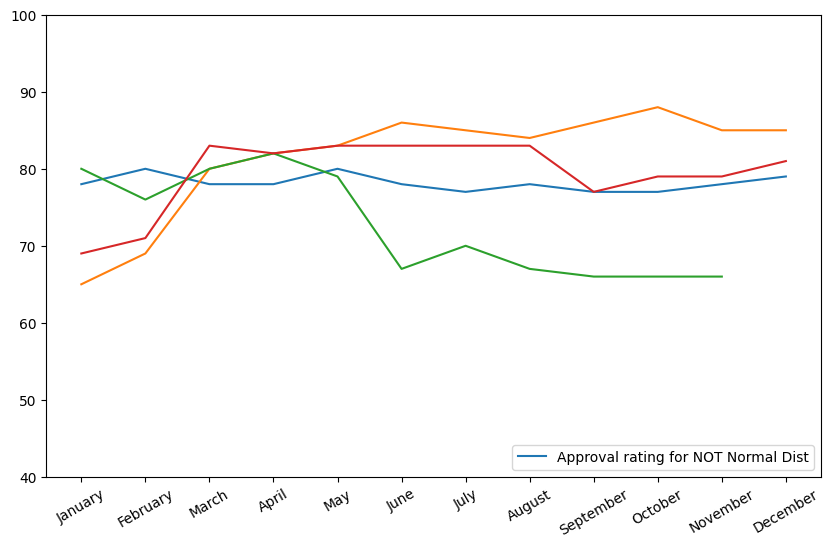

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.ylim(40,100, 10)

for df in range(len(years_not_norm)):
  plt.plot(years_not_norm[df]['Approve'])

positions = (0,1,2, 3, 4, 5, 6,7, 8,9,10,11)
labels = (months)
plt.legend(['Approval rating for NOT Normal Dist'], loc='lower right')
plt.xticks(positions, labels)
plt.xticks(rotation=30)


In [ ]:
years_not_nr

[2010, 2014, 2018, 2022]

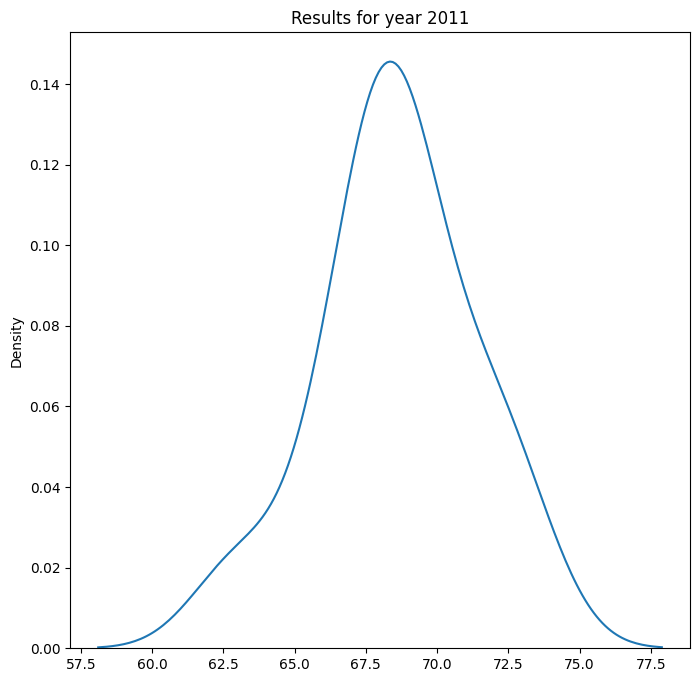

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))


temp = (years_normal[10]['Approve']).to_numpy()
sns.kdeplot(temp)

plt.title('Results for year 2011')
plt.savefig('/content/drive/MyDrive/movie_russia/April_data(MayVideo)/NO_normal_putinEXAMPLE.jpg', bbox_inches='tight')

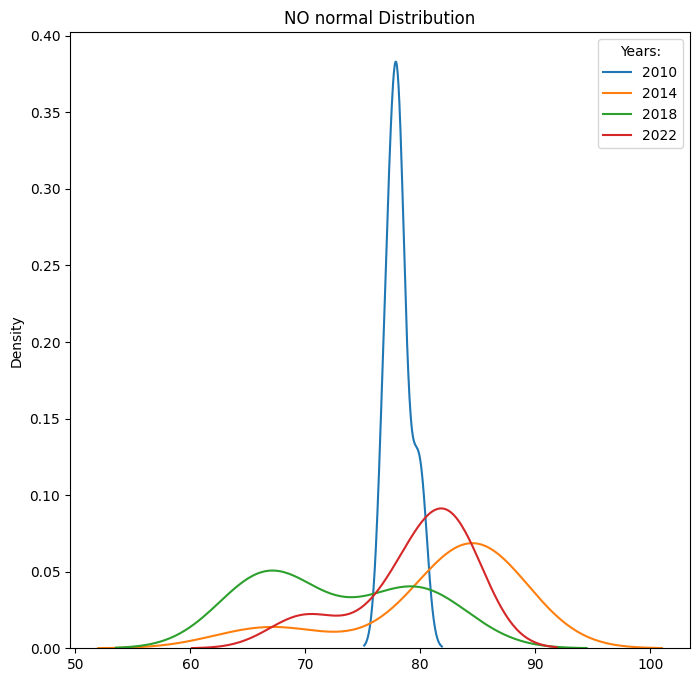

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))

for df in range(len(years_not_norm)):
  temp = (years_not_norm[df]['Approve']).to_numpy()
  sns.kdeplot(temp, label=years_not_nr[df])

plt.legend(title='Years:')
plt.title('NO normal Distribution')
plt.savefig('/content/drive/MyDrive/movie_russia/April_data(MayVideo)/NO_normal_putin.jpg', bbox_inches='tight')

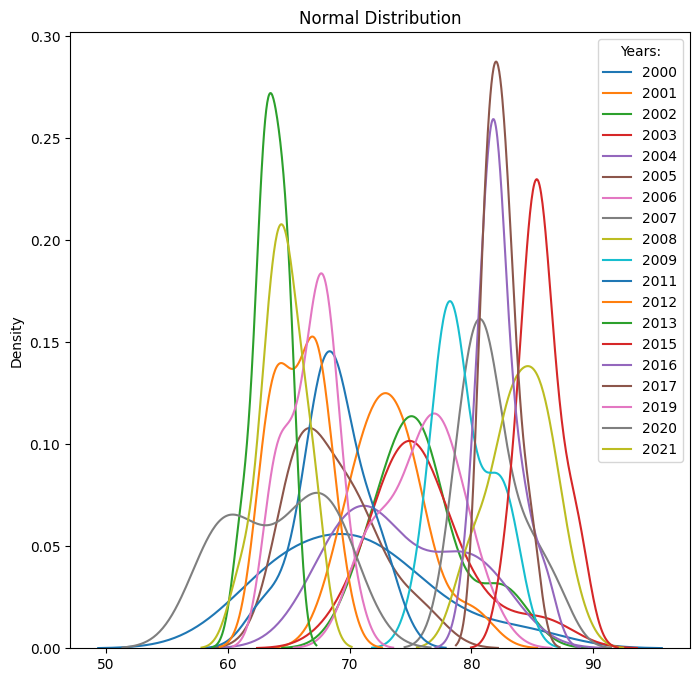

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
for df in range(len(years_normal)):
  temp = (years_normal[df]['Approve']).to_numpy()
  sns.kdeplot(temp, label=years_nr[df])

plt.legend(title='Years:')
plt.title('Normal Distribution')
plt.savefig('/content/drive/MyDrive/movie_russia/April_data(MayVideo)/normal_putin.jpg', bbox_inches='tight')

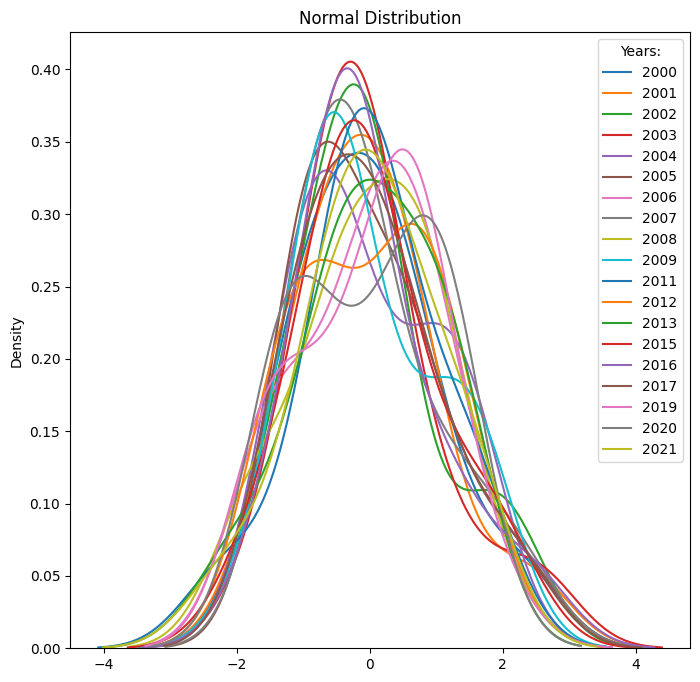

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
plt.figure(figsize=(8,8))

for df in range(len(years_normal)):
  temp = (years_normal[df]['Approve']).to_numpy()
  sns.kdeplot(stats.zscore(temp), label=years_nr[df])

plt.legend(title='Years:', loc='upper right')
plt.title('Normal Distribution')
plt.savefig('/content/drive/MyDrive/movie_russia/April_data(MayVideo)/centered_normal_putin.jpg', bbox_inches='tight')

In [ ]:
years_normal_gov = []
years_not_norm_gov=[]
df_list_gov=[]
years_nr_gov=[]
years_not_nr_gov= []
dict_gov = {}

for year in yr_list:
  yr_temp=data_gov[data_gov['date'].dt.year==int(year)]
  mu_loc = yr_temp['Approve'].mean()
  std_scale = yr_temp['Approve'].mean()
  sz_size = 12
  year_shap= yr_temp['Approve'].to_numpy()
  dict_gov[year] = year_shap
  df_list_gov.append(yr_temp)

  shapo = shapiro(year_shap)
  if shapo[1]>0.05:
    print(year, ':', shapo)
    temp_yes = data_gov[data_gov['date'].dt.year==int(year)]
    years_normal_gov.append(temp_yes)
    years_nr_gov.append(year)


  if shapo[1]<=0.05:
    print('Not normal distribution: ', year, shapo)
    temp_not = data_gov[data_gov['date'].dt.year==int(year)]
    years_not_norm_gov.append(temp_not)
    years_not_nr_gov.append(year)

Not normal distribution:  2000 ShapiroResult(statistic=0.8272502422332764, pvalue=0.019446760416030884)
2001 : ShapiroResult(statistic=0.9789578318595886, pvalue=0.9791639447212219)
2002 : ShapiroResult(statistic=0.9584665298461914, pvalue=0.7617347836494446)
2003 : ShapiroResult(statistic=0.921032726764679, pvalue=0.29458150267601013)
2004 : ShapiroResult(statistic=0.9173312783241272, pvalue=0.2645755410194397)
2005 : ShapiroResult(statistic=0.9386671781539917, pvalue=0.4810011684894562)
2006 : ShapiroResult(statistic=0.8899151086807251, pvalue=0.11754312366247177)
2007 : ShapiroResult(statistic=0.9555658102035522, pvalue=0.7191619277000427)
2008 : ShapiroResult(statistic=0.9121904373168945, pvalue=0.296378493309021)
2009 : ShapiroResult(statistic=0.9283792972564697, pvalue=0.3632500171661377)
2010 : ShapiroResult(statistic=0.9516704678535461, pvalue=0.661521852016449)
2011 : ShapiroResult(statistic=0.9550363421440125, pvalue=0.7113296389579773)
2012 : ShapiroResult(statistic=0.917597

In [ ]:
years_not_nr_gov

[2000, 2014, 2019, 2022]

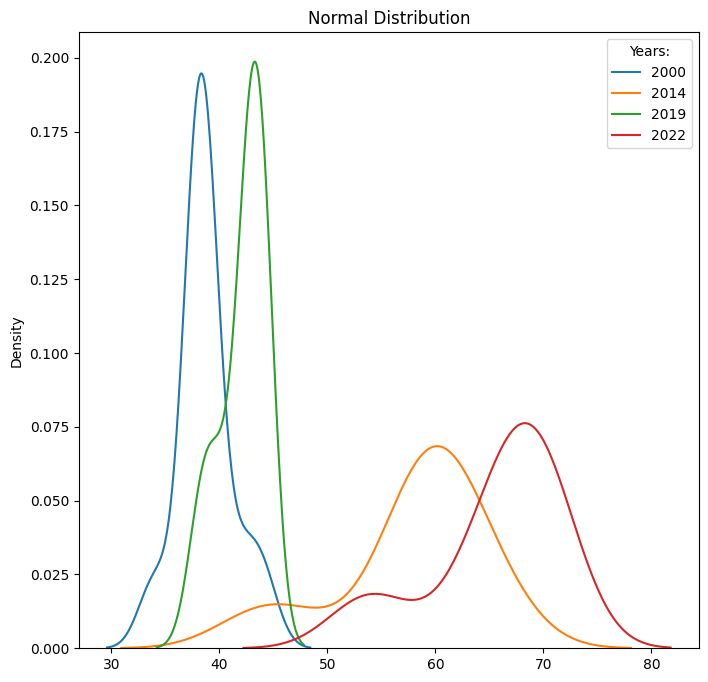

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
for df in range(len(years_not_norm_gov)):
  temp = (years_not_norm_gov[df]['Approve']).to_numpy()
  sns.kdeplot(temp, label=years_not_nr_gov[df])

plt.title('Normal Distribution')
plt.legend(title='Years:')
plt.savefig('/content/drive/MyDrive/movie_russia/April_data(MayVideo)/NOT_normal_gov.jpg', bbox_inches='tight')

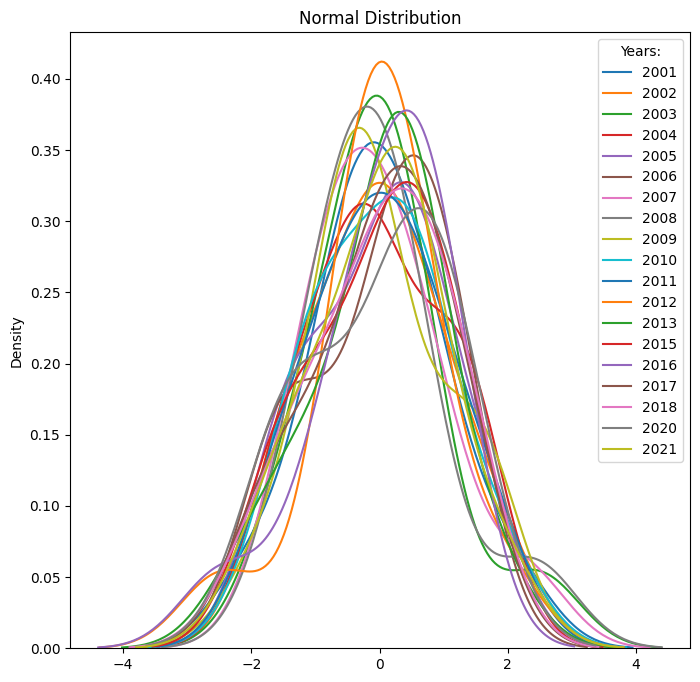

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

plt.figure(figsize=(8,8))
for df in range(len(years_normal_gov)):
  temp = (years_normal_gov[df]['Approve']).to_numpy()
  sns.kdeplot(stats.zscore(temp), label=years_nr_gov[df])

plt.legend(title='Years:', loc='upper right')
plt.title('Normal Distribution')
plt.savefig('/content/drive/MyDrive/movie_russia/April_data(MayVideo)/centered_normal_GOV.jpg', bbox_inches='tight')

In [ ]:
(1-(len(years_not_nr_gov)/len(years_nr_gov)))*100 #79% it follows normal distribution

78.94736842105263

In [ ]:
data_dir  =pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/2023-05-06/Levada_Russia_movinng_right.csv')


In [ ]:
data_dir['date'] = pd.to_datetime(data_dir['date'].str.strip(), format='%Y-%m')

In [ ]:
data_dir.columns

Index(['date', 'In the right direction', 'On the wrong track',
       'Difficult to answer'],
      dtype='object')

In [ ]:
years_normal_dir = []
years_not_norm_dir=[]
df_list_dir=[]
years_nr_dir=[]
years_not_nr_dir = []
dicto_dir = {}

for year in yr_list:
  yr_temp=data_dir[data_dir['date'].dt.year==int(year)]
  mu_loc = yr_temp['In the right direction'].mean()
  std_scale = yr_temp['In the right direction'].mean()
  sz_size = 12
  year_shap= yr_temp['In the right direction'].to_numpy()
  dicto_dir[year] = year_shap
  df_list_dir.append(yr_temp)

  shapo = shapiro(year_shap)
  if shapo[1]>0.05:
    print(year, ':', shapo)
    temp_yes = data_dir[data_dir['date'].dt.year==int(year)]
    years_normal_dir.append(temp_yes)
    years_nr_dir.append(year)


  if shapo[1]<=0.05:
    print('Not normal distribution: ', year, shapo)
    temp_not = data_dir[data_dir['date'].dt.year==int(year)]
    years_not_norm_dir.append(temp_not)
    years_not_nr_dir.append(year)

2000 : ShapiroResult(statistic=0.9454233050346375, pvalue=0.5861800909042358)
2001 : ShapiroResult(statistic=0.9172530174255371, pvalue=0.26397231221199036)
2002 : ShapiroResult(statistic=0.8996536135673523, pvalue=0.18305867910385132)
Not normal distribution:  2003 ShapiroResult(statistic=0.8408588171005249, pvalue=0.03241005912423134)
2004 : ShapiroResult(statistic=0.8757628798484802, pvalue=0.07736759632825851)
2005 : ShapiroResult(statistic=0.9223520755767822, pvalue=0.3059999346733093)
Not normal distribution:  2006 ShapiroResult(statistic=0.8218603134155273, pvalue=0.016785956919193268)
Not normal distribution:  2007 ShapiroResult(statistic=0.8471644520759583, pvalue=0.033875226974487305)
Not normal distribution:  2008 ShapiroResult(statistic=0.857516884803772, pvalue=0.0455138124525547)
Not normal distribution:  2009 ShapiroResult(statistic=0.8518563508987427, pvalue=0.038705430924892426)
2010 : ShapiroResult(statistic=0.9044831991195679, pvalue=0.18120644986629486)
2011 : Shapi

# Wiki data

In [ ]:
url_censor = ['https://en.wikipedia.org/wiki/Censorship_in_the_Russian_Federation',
              'https://en.wikipedia.org/wiki/Russian_2022_war_censorship_laws', 
              'https://en.wikipedia.org/wiki/Roskomnadzor', ]



## Censorship Wiki

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
def get_data(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  all_p = soup.findAll('p')
  return all_p

In [ ]:
soup_p=[]
def clen_data (data_tx):
  for item in data_tx:
    clean = item.get_text() 
    soup_p.append(clean)
  return soup_p


In [ ]:
for url in url_censor:
  data_row = get_data(url)
  data_clean = clen_data (data_row)


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sentence_list=[]
for sent  in data_clean:
  sentence_list.append(sent_tokenize(sent))


In [ ]:
listo_clean = []

for item in sentence_list:
  for txt in item:
    if len(txt)>78:
      date = re.search(r'(20).{2}', txt)
      if date:
        testo = date.group(0),txt
        listo_clean.append(testo)


In [ ]:
import pandas as pd

df = pd.DataFrame.from_records(listo_clean, columns=['year','event_censorship'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              138 non-null    object
 1   event_censorship  138 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [ ]:
df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)

In [ ]:
df = df[df['year']>1999]

In [ ]:
censorship_year = df.groupby('year')['event_censorship'].count().reset_index()
censorship_year.head()

,year,event_censorship
0,2007,1
1,2008,4
2,2009,11
3,2010,2
4,2011,2


In [ ]:
censorship_year.to_csv('/content/drive/MyDrive/RUSSdata/wiki/cnsorship_evnts_clan_count.csv', index=False)

## Protest Wiki

In [ ]:
url_protest = ['https://en.wikipedia.org/wiki/2011%E2%80%932013_Russian_protests',
               'https://en.wikipedia.org/wiki/2017%E2%80%932018_Russian_protests', 
               'https://en.wikipedia.org/wiki/2021_Russian_protests', 
               'https://en.wikipedia.org/wiki/Anti-war_protests_in_Russia_(2022%E2%80%93present)'] #h3 and p #h3 and p

url_add_protest1 = 'https://en.wikipedia.org/wiki/2019_Moscow_protests' #h2 and p
url_add_protest2 ='https://en.wikipedia.org/wiki/2020%E2%80%932021_Khabarovsk_Krai_protests' #h 4 and p


source: 'https://en.wikipedia.org/wiki/2014_anti-war_protests_in_Russia'
extract: 

"The 2014 anti-war protests in Russia refers to a series of anti-war demonstrations opposing the Russian military intervention in Ukraine that took place in Russia in 2014. Protesters held two anti-war protest rallies on 2 and 15 March 2014."...
..."21 September
Another anti-war rally with about 5,000 to 20,000 demonstrators took place on Pushkinskaya Square in Moscow on 21 September 2014"...

In [ ]:
line2014_manu={'2 March 2014':  'anti-war protest rallies',
               '15 March 2014':  'anti-war protest rallies on 2 and 15 March 2014',
               '21 September2014':'anti-war rally with about 5,000 to 20,000 demonstrators took place on Pushkinskaya Square in Moscow'}
               

In [ ]:
df_line2014_manu = pd.DataFrame.from_dict(line2014_manu,orient='index').reset_index()
df_line2014_manu.columns= ['date','event_protest']
df_line2014_manu.insert(0, 'year_list', '2014')
df_line2014_manu

,year_list,date,event_protest
0,2014,2 March 2014,anti-war protest rallies
1,2014,15 March 2014,anti-war protest rallies on 2 and 15 March 2014
2,2014,21 September2014,"anti-war rally with about 5,000 to 20,000 demo..."


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
def get_data_long(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  return soup


def clean_up(url, href):
  soup = get_data_long(url)
  temp_all=[]
  for header in soup.findAll([href]):
    test = header.get_text()
    test = re.sub(r'\[.*?\]', "",test )
    test= str(test)

    for elem in header.next_siblings:
      if elem.name and elem.name.startswith('h'):
          break
      if elem.name == 'p':
        ev = elem.get_text()
        ev= ev.strip()
        ev = re.sub(r'\[.*?\]', "",ev )
        ev=str(ev)
        date = re.search(r'(20).{2}', ev) 
        data =  test, ev
        temp_all.append(data)

  return temp_all

In [ ]:
line11_13 = clean_up('https://en.wikipedia.org/wiki/2011%E2%80%932013_Russian_protests','h3' )


In [ ]:
line17_18 = clean_up('https://en.wikipedia.org/wiki/2017%E2%80%932018_Russian_protests','h3') 

In [ ]:
line_2021 = clean_up('https://en.wikipedia.org/wiki/2021_Russian_protests','h3') 

In [ ]:
line4_2022 = clean_up('https://en.wikipedia.org/wiki/Anti-war_protests_in_Russia_(2022%E2%80%93present)','h3')


In [ ]:
line_krai_20_21 = clean_up('https://en.wikipedia.org/wiki/2020%E2%80%932021_Khabarovsk_Krai_protests','h4' )

In [ ]:
line_moscow_19 = clean_up('https://en.wikipedia.org/wiki/2019_Moscow_protests','h3' ) #needs h3 as well 

In [ ]:
import pandas as pd
import numpy as np

df_line11_13 = pd.DataFrame.from_records(line11_13, columns=['date','event_protest'])
df_line11_13.head()

,date,event_protest
0,Previous protest rallies in 2000s,"In the 2000s, due to increased restrictions in..."
1,Previous protest rallies in 2000s,The largest protests and main opposition event...
2,Previous protest rallies in 2000s,"Committee 2008, wide coalition The Other Russi..."
3,2011 election,"According to RIA Novosti, there were more than..."
4,2011 election,The Central Electoral Commission issued a repo...


In [ ]:
year_list = []
for item in df_line11_13['date']:
  data=(re.search(r'(20).{2}', item))
  if data:
    year_list.append(data.group(0))
  else:
    year_list.append('None')


In [ ]:
df_line11_13.insert(0,'year_list',year_list)

In [ ]:
df_line11_13= df_line11_13[df_line11_13['year_list']!='None']

In [ ]:
df_line11_13.head()

,year_list,date,event_protest
0,2000,Previous protest rallies in 2000s,"In the 2000s, due to increased restrictions in..."
1,2000,Previous protest rallies in 2000s,The largest protests and main opposition event...
2,2000,Previous protest rallies in 2000s,"Committee 2008, wide coalition The Other Russi..."
3,2011,2011 election,"According to RIA Novosti, there were more than..."
4,2011,2011 election,The Central Electoral Commission issued a repo...


In [ ]:
df_line17_18 = pd.DataFrame.from_records(line17_18, columns=['date','event_protest'])


In [ ]:
year_list_18 = []
for item in df_line17_18['date']:
  data=(re.search(r'(20).{2}', item))
  if data:
    year_list_18 .append(data.group(0))
  else:
    year_list_18 .append('2018')

In [ ]:
df_line17_18.insert(0,'year_list',year_list_18)

In [ ]:
df_line17_18.tail()

,year_list,date,event_protest
10,2018,30 April 2018,"Approximately 13,000 people gathered in Moscow..."
11,2018,5 May 2018,Mass protest actions and rallies took place in...
12,2018,July–September 2018,"From July, almost every weekend, protest ralli..."
13,2018,July–September 2018,"The most noticeable street rallies, related wi..."
14,2018,Chelyabinsk,"On 5 May, an estimated 2,000 to 5,000 protests..."


In [ ]:
df_line_2021 = pd.DataFrame.from_records(line_2021, columns=['date','event_protest'])
df_line_2021.insert(0,'year_list','2021')
df_line_2021.head()

,year_list,date,event_protest
0,2021,23 January,"Reuters estimated up to 40,000 protesters gath..."
1,2021,23 January,"According to Kommersant, about 5,000 protester..."
2,2021,23 January,Estimates of the number of protesters in Perm ...
3,2021,23 January,"In Siberia, around 4,000 protesters gathered i..."
4,2021,23 January,Estimates of the number of protesters in Yekat...


In [ ]:
df_line4_2022  = pd.DataFrame.from_records(line4_2022 , columns=['date','event_protest']) #insert year date
df_line4_2022 = df_line4_2022.iloc[:54, :]
df_line4_2022.insert(0,'year_list','2022')
df_line4_2022.head()

,year_list,date,event_protest
0,2022,February,"On the afternoon of the invasion, the Investig..."
1,2022,February,"On the following day, 25 February, further pro..."
2,2022,February,"On 26 February, some Russian protestors chose ..."
3,2022,February,Protests continued on 27 February. The protest...
4,2022,March,"On 1 March, reports and photographs appeared i..."


In [ ]:
df_line_krai_20_21  = pd.DataFrame.from_records(line_krai_20_21 , columns=['date','event_protest']) 


In [ ]:
year_list_k = []
for item in df_line_krai_20_21 ['event_protest']:
  data=(re.search(r'(202).{1}', item))
  if data:
    year_list_k.append(data.group(0))
  else:
    year_list_k.append('2020')

In [ ]:
df_line_krai_20_21.insert(0,'year_list',year_list_k)

In [ ]:
df_line_krai_20_21.head()

,year_list,date,event_protest
0,2020,July,"On 11 July, 10 to 12 thousand people took part..."
1,2020,July,"On 12 July, Deputy Prime Minister of Russia — ..."
2,2020,July,"On 15 July, the federal authorities started to..."
3,2020,July,"On 18 July, the second major rally in Khabarov..."
4,2020,July,"On 20 July, Putin dismissed Sergei Furgal due ..."


In [ ]:
line_moscow_19  = pd.DataFrame.from_records(line_moscow_19, columns=['date','event_protest']) 
line_moscow_19.insert(0,'year_list','2019')


In [ ]:
line_moscow_19.head()

,year_list,date,event_protest
0,2019,Rally on Sakharov Avenue,"On July 20, a permitted rally was held on Sakh..."
1,2019,"Between 20 and 27 July - criminal case, arrest...","On July 23, the CEC head, Ella Pamfilova, held..."
2,2019,"Between 20 and 27 July - criminal case, arrest...","On the morning of July 24, Alexey Navalny was ..."
3,2019,"Between 20 and 27 July - criminal case, arrest...",The Office of the Investigative Committee in M...
4,2019,"Between 20 and 27 July - criminal case, arrest...","On July 25, the MCEC, on the recommendation of..."


In [ ]:
protest_df_all_list = [df_line11_13,df_line17_18,df_line_2021,df_line4_2022,df_line_krai_20_21,line_moscow_19,df_line2014_manu]

In [ ]:
all_years_protests = pd.concat(protest_df_all_list )


In [ ]:
all_years_protests_gr = all_years_protests.groupby('year_list')['event_protest'].count().reset_index()

In [ ]:
all_years_protests_gr.to_csv('/content/drive/MyDrive/RUSSdata/wiki/protest_evnts_clan_count.csv', index=False)

In [ ]:

protests = pd.read_csv('/content/drive/MyDrive/RUSSdata/wiki/protest_evnts_clan_count.csv')

In [ ]:
censorship = pd.read_csv('/content/drive/MyDrive/RUSSdata/wiki/cnsorship_evnts_clan_count.csv')

In [ ]:
positions = []
for item in range(len(yr_list)):
  positions.append(item)

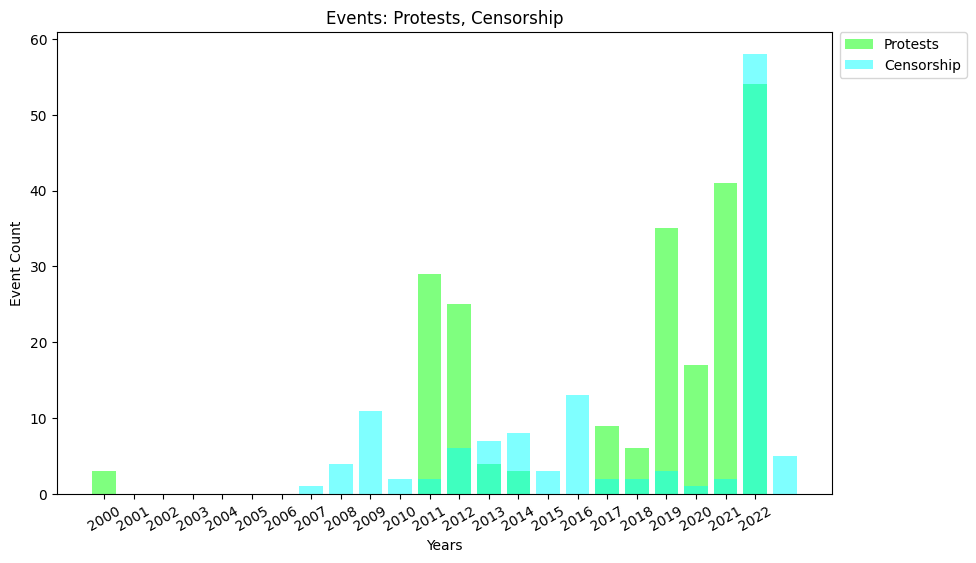

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.bar(protests['year_list'],protests['event_protest'], alpha =0.5, color ='lime',label ='Protests' )
plt.bar(censorship['year'],censorship['event_censorship'], alpha =0.5,color ='cyan', label ='Censorship')

# for item in years_not_nr:
#   plt.axvline(x=item,color='blue')
# for item in years_not_nr_gov:
#   plt.axvline(x=item+0.1, color='blue')

plt.ylabel('Event Count')
plt.xlabel('Years')

plt.xticks(range(min(protests['year_list']), max(protests['year_list'])+1))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
#plt.text(2025,40, 'Vertical Lines:\n Year not normally distributed',color='blue')
plt.title('Events: Protests, Censorship')
plt.savefig('/content/drive/MyDrive/movie_russia/April_data(MayVideo)/event1NOLINES.jpg', bbox_inches='tight')

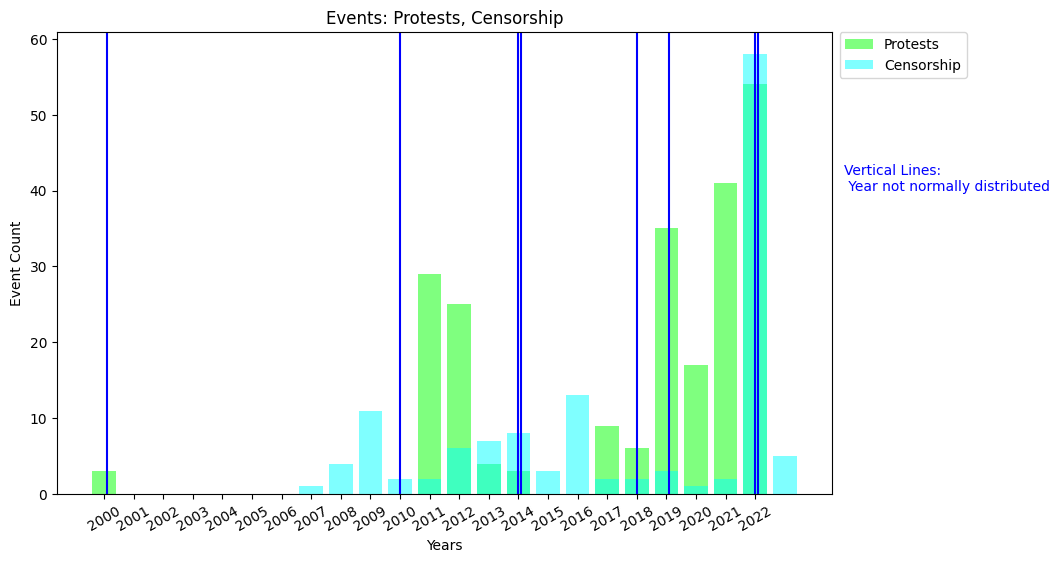

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.bar(protests['year_list'],protests['event_protest'], alpha =0.5, color ='lime',label ='Protests' )
plt.bar(censorship['year'],censorship['event_censorship'], alpha =0.5,color ='cyan', label ='Censorship')

for item in years_not_nr:
  plt.axvline(x=item,color='blue')
for item in years_not_nr_gov:
  plt.axvline(x=item+0.1, color='blue')

plt.ylabel('Event Count')
plt.xlabel('Years')

plt.xticks(range(min(protests['year_list']), max(protests['year_list'])+1))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.text(2025,40, 'Vertical Lines:\n Year not normally distributed',color='blue')
plt.title('Events: Protests, Censorship')
plt.savefig('/content/drive/MyDrive/movie_russia/April_data(MayVideo)/event1.jpg', bbox_inches='tight')

In [ ]:
positions = (0,1,2, 3, 4, 5, 6,7, 8,9,10,11)
labels = (months)


In [ ]:
positions = []
for item in range(len(yr_list)):
  positions.append(item)

In [ ]:
terror = clean_up('https://en.wikipedia.org/wiki/Terrorism_in_Russia','h4' )

In [ ]:
terror_df = pd.DataFrame.from_records(terror, columns=['date','event_terror'])

In [ ]:
terror_df

,date,event_terror
0,2010,In March 2010 suicide bombings were carried ou...
1,2011,The Domodedovo International Airport bombing w...
2,2011,The bombing killed 37 people and injured 173 o...
3,2011,Russia's Federal Investigative Committee later...
4,2013,"In December 2013, two separate suicide bombing..."
5,2013,"On 21 October 2013, a suicide bombing took pla..."
6,2014,On 5 October 2014 a 19-year-old man named Opti...
7,2014,"On 4 December 2014, a group of Islamist milita..."
8,2014,"14 policemen, 11 militants and 1 civilian were..."
9,2015,Metrojet Flight 9268 was an international char...


In [ ]:
terrror_short = terror_df[terror_df['event_terror'].str.contains(' killed')]

In [ ]:
terror_gr = terrror_short.groupby('date')['event_terror'].count().reset_index()

In [ ]:
tr_list = (terror_gr.date).astype(int).to_list()

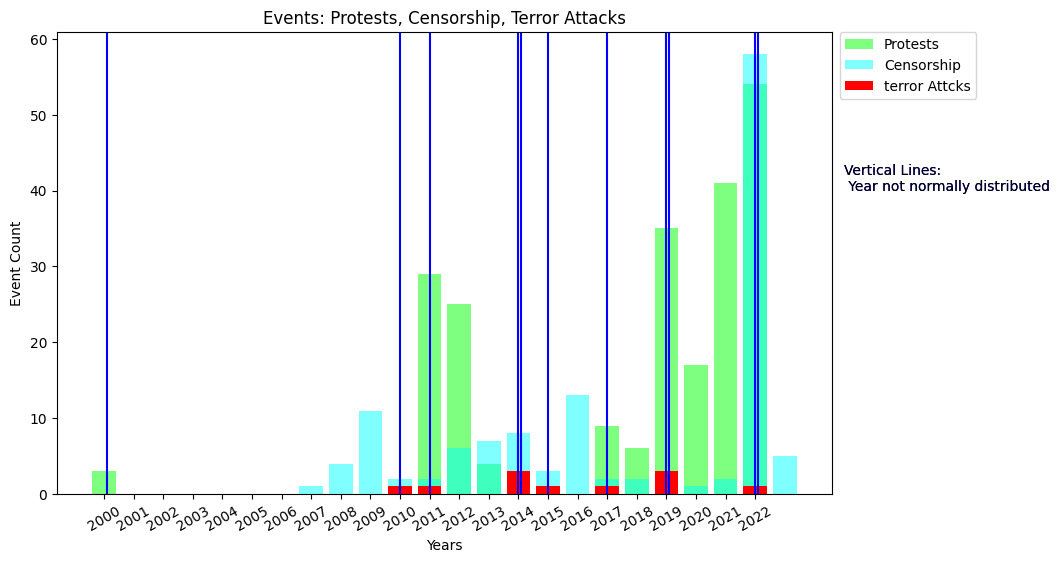

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.bar(protests['year_list'],protests['event_protest'], alpha =0.5, color ='lime',label ='Protests' )
plt.bar(censorship['year'],censorship['event_censorship'], alpha =0.5,color ='cyan', label ='Censorship')
plt.bar(terror_gr['date'].astype(int),terror_gr['event_terror'], color ='red', label ='terror Attcks')

for item in tr_list:
  plt.axvline(x=item,color='blue')
for item in years_not_nr_gov:
  plt.axvline(x=item+0.1, color='blue')

plt.ylabel('Event Count')
plt.xlabel('Years')

plt.xticks(range(min(protests['year_list']), max(protests['year_list'])+1))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.text(2025,40, 'Vertical Lines:\n Year not normally distributed',color='blue')
plt.title('Events: Protests, Censorship, Terror Attacks')
plt.text(2025,40, 'Vertical Lines:\n Year not normally distributed')
plt.savefig('/content/drive/MyDrive/movie_russia/April_data(MayVideo)/event2.jpg', bbox_inches='tight')

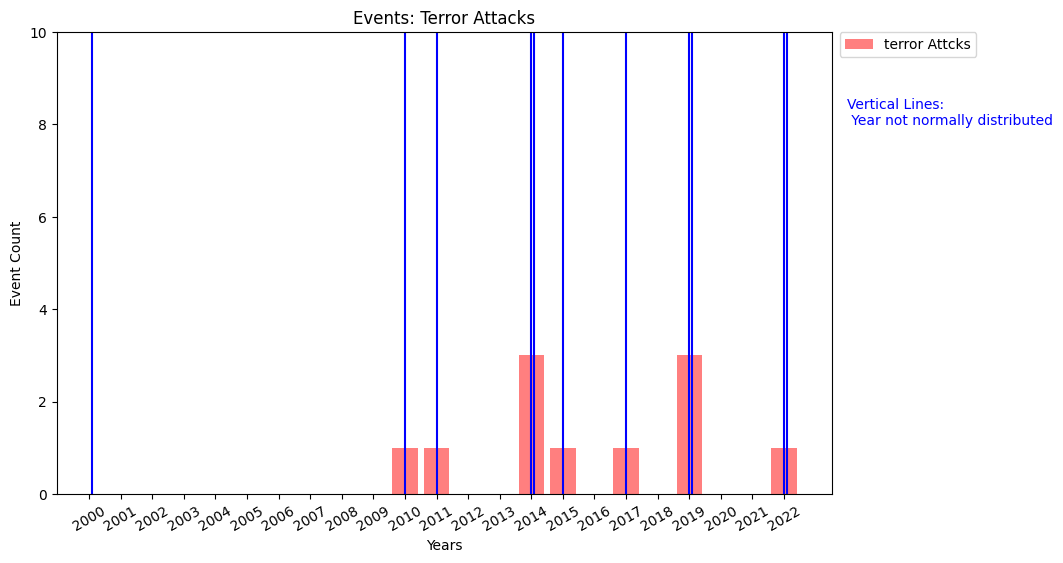

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.ylim(0,10)
plt.bar(terror_gr['date'].astype(int),terror_gr['event_terror'], alpha=0.5, color = 'red',label ='terror Attcks')

for item in tr_list:
  plt.axvline(x=item,color='blue')
for item in years_not_nr_gov:
  plt.axvline(x=item+0.1, color='blue')

plt.ylabel('Event Count')
plt.xlabel('Years')

plt.xticks(range(min(protests['year_list']), max(protests['year_list'])+1))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.title('Events: Terror Attacks')
plt.text(2024,8, 'Vertical Lines:\n Year not normally distributed',color='blue')
plt.savefig('/content/drive/MyDrive/movie_russia/April_data(MayVideo)/event3.jpg', bbox_inches='tight')